In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np

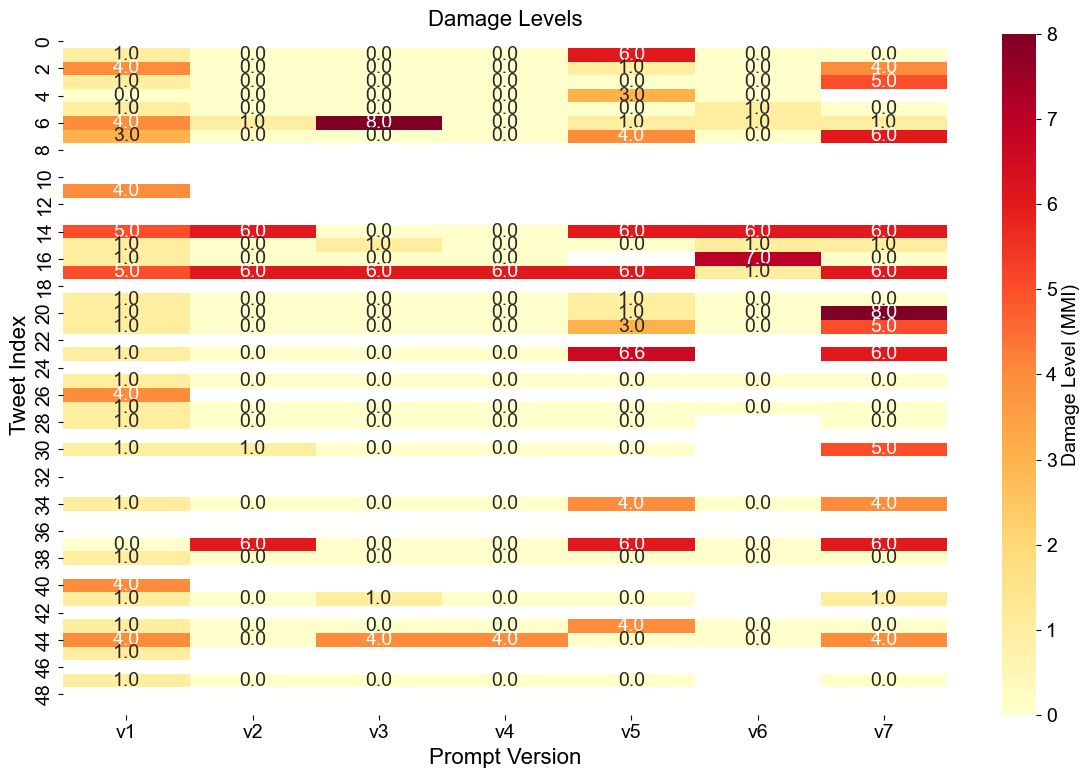

In [9]:
# Load your Excel file
df = pd.read_excel("prompt_all_llava_CA.xlsx")  # Replace with your actual path

# Correct damage level column names (check your file structure)
damage_level_cols = [
    'damage_level__v1',  # double underscore
    'damage_level_v2',
    'damage_level_v3',
    'damage_level_v4',
    'damage_level_v5',
    'damage_level_v6',
    'damage_level_v7',
]

# Extract and convert to numeric
heatmap_data = df[damage_level_cols].apply(pd.to_numeric, errors='coerce')

# Set font globally (Arial or fallback)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 14

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    cbar_kws={"label": "Damage Level (MMI)"}
)

plt.title("Damage Levels", fontsize=16)
plt.xlabel("Prompt Version", fontsize=16)
plt.ylabel("Tweet Index", fontsize=16)
plt.xticks(
    ticks=[i + 0.5 for i in range(len(damage_level_cols))],
    labels=[f"v{i}" for i in range(1, 8)],
    rotation=0,
    fontsize=14
)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


In [10]:
# Define relevant damage level columns
damage_level_cols = [
    'damage_level__v1', 'damage_level_v2', 'damage_level_v3',
    'damage_level_v4', 'damage_level_v5', 'damage_level_v6', 'damage_level_v7'
]

# Convert columns to numeric
for col in damage_level_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Compute summary
summary_df = pd.DataFrame({
    'prompt_version': [f'v{i}' for i in range(1, 8)],
    'damage_level_mean': [df[col].mean() for col in damage_level_cols],
    'damage_level_std': [df[col].std() for col in damage_level_cols],
})

# Save summary
csv_path = "prompts_summary_df_qwen_JP.csv"
summary_df.to_csv(csv_path, index=False)

summary_df, csv_path


(  prompt_version  damage_level_mean  damage_level_std
 0             v1           1.866667          1.547709
 1             v2           0.769231          1.945409
 2             v3           0.769231          2.025985
 3             v4           0.384615          1.387859
 4             v5           2.104000          2.473944
 5             v6           0.809524          1.939563
 6             v7           2.720000          2.776689,
 'prompts_summary_df_qwen_JP.csv')

In [11]:
from scipy.stats import chi2_contingency

#Damage type analysis
# Step 1: Identify damage_type columns
damage_type_cols = [col for col in df.columns if col.startswith("damage_type_") and "same" not in col]

# Step 2: Clean up: Replace missing/non-string cells with "None"
for col in damage_type_cols:
    df[col] = df[col].apply(lambda x: x if isinstance(x, str) and x.strip() != "" else "None")

# Step 3: Create contingency table of category frequencies
contingency_table = pd.DataFrame({
    col: df[col].value_counts().reindex(['Interior', 'Exterior', 'Both', 'None'], fill_value=0)
    for col in damage_type_cols
}).T

# Step 4: Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Step 5: Cramér’s V
def cramers_v(chi2, n, k):
    return np.sqrt(chi2 / (n * (k - 1)))

n = df.shape[0]  # number of rows
k = contingency_table.shape[1]  # number of categories
cramers_v_value = cramers_v(chi2_stat, n, k)

# Step 6: Print results
print("Chi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("p-value:", p_value)
print("Cramér’s V:", cramers_v_value)
print("\nContingency Table (Counts):")
print(contingency_table)


Chi-Square Statistic: 41.99036338418863
Degrees of Freedom: 18
p-value: 0.0011093252475334139
Cramér’s V: 0.52908955375682

Contingency Table (Counts):
                 Interior  Exterior  Both  None
damage_type__v1         0         0     8    42
damage_type_v2          0         0     2    48
damage_type_v3          0         0     3    47
damage_type_v4          0         0     2    48
damage_type_v5          1         4     5    40
damage_type_v6          1         0     2    46
damage_type_v7          3         1     8    38


In [12]:
# Step 1: Identify confidence columns
confidence_cols = [col for col in df.columns if col.startswith("confidence_") and "same" not in col]

# Step 2: Convert to numeric (invalid strings become NaN)
for col in confidence_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 3: Calculate mean and std dev
confidence_summary = pd.DataFrame({
    'prompt_version': [f'v{i}' for i in range(1, len(confidence_cols) + 1)],
    'confidence_mean': [df[col].mean() for col in confidence_cols],
    'confidence_std': [df[col].std() for col in confidence_cols],
})

# Step 4: Save or display
confidence_summary.to_csv("prompts_summary_CD_JP.csv", index=False)
print(confidence_summary)


  prompt_version  confidence_mean  confidence_std
0             v1         0.853333        0.089955
1             v2         0.915385        0.140548
2             v3         0.961538        0.069725
3             v4         0.915385        0.054349
4             v5         0.840000        0.184842
5             v6         0.709524        0.325814
6             v7         0.832000        0.118040


In [13]:
# Reload original data column values to reapply correct categorization
llava_df = pd.read_excel("prompt_all_qwen_JP.xlsx")

# Step 1: Identify all human impact columns again
human_impact_cols = [col for col in llava_df.columns if col.startswith("human_impact_") and "same" not in col]

# Step 2: Apply updated recoding
# 1 = impact, 0 = non-impact, all other values (NaN, strings, etc.) = -1 (undefined)
for col in human_impact_cols:
    llava_df[col] = llava_df[col].apply(lambda x: 1 if x == 1 else (0 if x == 0 else -1))

# Step 3: Create full categorical contingency table
contingency_table_full = pd.DataFrame({
    col: llava_df[col].value_counts().reindex([-1, 0, 1], fill_value=0)
    for col in human_impact_cols
}).T

# Step 4: Drop any column categories with zero totals
nonzero_columns_full = contingency_table_full.columns[contingency_table_full.sum(axis=0) > 0]
contingency_table_full_cleaned = contingency_table_full[nonzero_columns_full]

# Step 5: Perform Chi-Square test
chi2_stat_full, p_value_full, dof_full, expected_full = chi2_contingency(contingency_table_full_cleaned)

# Step 6: Cramér’s V
k_full = contingency_table_full_cleaned.shape[1]
n_full = contingency_table_full_cleaned.values.sum()
cramers_v_full = cramers_v(chi2_stat_full, n_full, k_full)

# Output full results
chi2_stat_full, p_value_full, dof_full, cramers_v_full, contingency_table_full_cleaned


(np.float64(8.536050156739812),
 np.float64(0.7419634601044119),
 12,
 np.float64(0.11042806421725937),
                   -1   0   1
 human_impact__v1  23  12  15
 human_impact_v2   23   7  20
 human_impact_v3   23  11  16
 human_impact_v4   22  14  14
 human_impact_v5   23   9  18
 human_impact_v6   26   6  18
 human_impact_v7   28   7  15)